[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Notas_Estructuradas/blob/main/Sesion02_NotasE_Bonos_Opciones.ipynb)

# Bonos, Bonos con cupones y Opciones

Versión de interes simple:

$$ VP = \dfrac{VN}{1+r\times t}$$

Versión de interés compuesto discreto:

$$ VP = \dfrac{VN}{(1 + r)^t} $$

In [ ]:
# Parámetros del bono
valor_nominal = 100         # Valor nominal
tasa_anual = 0.09           # Tasa de interés (9%)
años = 3                    # Tiempo hasta el vencimiento EN AÑOS

# Valor presente
valor_presente = valor_nominal / (1 + tasa_anual) ** años

print(f"Valor presente del bono (descuento simple): {valor_presente}")

Valor presente del bono (descuento simple): 77.21834800610641


Versión de interes compuesto continuo:

$$ VP = \dfrac{VN}{e^{rt}} = VN \times e^{-rt} $$

In [ ]:
np.exp(1)

np.float64(2.718281828459045)

In [ ]:
import numpy as np

In [ ]:
np.exp(1)

np.float64(2.718281828459045)

In [ ]:
# Parámetros del bono
valor_nominal = 100        # Valor nominal
tasa_continua = 0.09        # Tasa de interés continua (5%)
años = 3                    # Tiempo hasta el vencimiento en años

# Valor presente usando interés compuesto continuo
valor_presente = valor_nominal * np.exp(-tasa_continua * años)

print(f"Valor presente del bono (descuento continuo): {valor_presente}")

Valor presente del bono (descuento continuo): 76.33794943368531


# Pregunta 1:

¿Porque es mas caro el compuesto continuo a comparación del discreto? ¿Siempre lo será?

Respuesta: Si

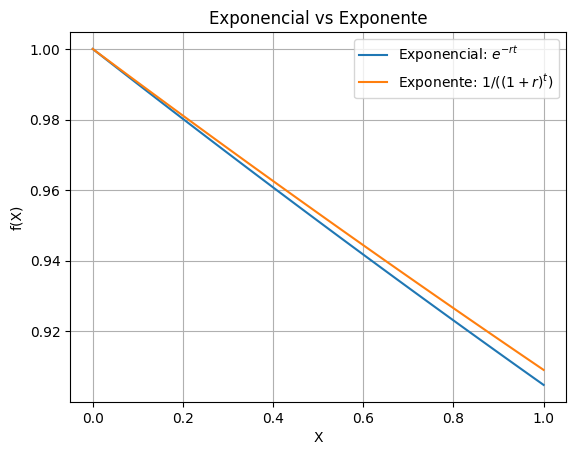

In [ ]:
# Respuesta visual a la pregunta anterior
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 1, 100)
r = 0.10

# Funciones:
valor = 1/np.exp(r*t)
valor2 = 1/((1+r)**t)

# Graficar
plt.plot(t, valor, label='Exponencial: $e^{-rt}$')
plt.plot(t, valor2, label='Exponente: $1/((1+r)^t)$')
plt.title("Exponencial vs Exponente")
plt.xlabel("X")
plt.ylabel("f(X)")
plt.grid(True)
plt.legend()
plt.show()

# Bono con cupones



$$ P = \sum_{t=1}^{n} \dfrac{C}{(1+r)^t} + \dfrac{F}{(1+r)^{n}} $$

In [ ]:
# Parámetros del bono
valor_nominal = 1000        # Valor nominal
tasa_cupon = 0.06           # Tasa de cupón anual (6%)
tasa_descuento = 0.09       # Tasa de descuento del mercado (9%)
años = 5                    # Tiempo hasta el vencimiento

# Cálculo del valor presente de los cupones
valor_cupon = valor_nominal * tasa_cupon
valor_presente_cupones = 0
i = 1
while i <= años:
    valor_presente_cupones += valor_cupon / ((1 + tasa_descuento) ** i)
    print(f"año: {i} , valor de la parte del cupón: {valor_cupon / ((1 + tasa_descuento) ** i)}")
    i += 1


# Cálculo del valor presente del principal
valor_presente_principal = valor_nominal / ((1 + tasa_descuento) ** años)

# Valor total del bono
valor_total = valor_presente_cupones + valor_presente_principal

print(f"Valor del bono con cupones: {valor_total}")

año: 1 , valor de la parte del cupón: 55.04587155963302
año: 2 , valor de la parte del cupón: 50.5007995959936
año: 3 , valor de la parte del cupón: 46.33100880366385
año: 4 , valor de la parte del cupón: 42.50551266391178
año: 5 , valor de la parte del cupón: 38.995883177900716
Valor del bono con cupones: 883.3104620994483


Pregunta 2:

¿Que inconveniente tiene programar así?

Respuesta: No es reusable

In [ ]:
def precio_bono_con_cupones(valor_nominal, tasa_cupon, tasa_descuento, años):
    precio = 0.0
    cupon = valor_nominal * tasa_cupon

    for t in range(1, años + 1):
        precio += cupon / (1 + tasa_descuento) ** t

    precio += valor_nominal / (1 + tasa_descuento) ** años
    return precio

In [ ]:
precio = precio_bono_con_cupones(1000,0.06,0.05,5)

print(f"Precio del bono con cupones: {precio}")

Precio del bono con cupones: 1043.2947667063079


¿Que tal si nos interesa saber que parte del valor viene de los cupones descontados y que parte viene del valor Facial del bono traido a valor presente (es decir, los dos sumandos de la fórmula por separado)?

In [ ]:
def precio_bono_con_cupones_desmenuzado(valor_nominal, tasa_cupon, tasa_descuento, años):
    cupon = valor_nominal * tasa_cupon
    valor_presente_cupones = 0.0

    for t in range(1, años + 1):
        valor_presente_cupones += cupon / (1 + tasa_descuento) ** t

    valor_presente_principal = valor_nominal / (1 + tasa_descuento) ** años

    return valor_presente_cupones, valor_presente_principal


In [ ]:
cupones, principal = precio_bono_con_cupones_desmenuzado(
    valor_nominal=1000,
    tasa_cupon=0.06,
    tasa_descuento=0.05,
    años=5
)

precio_total = cupones + principal

print(f"Valor presente de cupones: {cupones}")
print(f"Valor presente del principal: {principal}")
print(f"Precio total del bono: {precio_total}")

Valor presente de cupones: 259.7686002378491
Valor presente del principal: 783.5261664684588
Precio total del bono: 1043.2947667063079


In [ ]:
una_sola_variable = precio_bono_con_cupones_desmenuzado(
    valor_nominal=1000,
    tasa_cupon=0.06,
    tasa_descuento=0.05,
    años=5
)

In [ ]:
una_sola_variable

(259.7686002378491, 783.5261664684588)

# Opción Europea de tipo Call

En esta sesión aprenderemos a utilizar una fórmula matemática, conocida como Black-Scholes, para dar un precio a nuestras opciones (tipo Call Europeo).

Una Call Europeo es un contrato en el cual se pacta la posibilidad de comprar cierta cantidad de activos en el futuro, pero al precio que se establece actualmente.


Ejemplo:

Las acciones de Google cuestan \$100, yo veo que Google dice "Págame \$3 y en 30 días te vendo la acción a \$110" o "Págame \$5 y en 30 días te vendo la acción a \$100". Imaginemos que escojo pagarle \$3, entonces:

- Si no decido comprar el contrato no pasa nada.

- Si decido comprar el contrato hay "tres" posibilidades:
  - Si veo que en 30 días la acción cotiza a \$120, ejerzo el contrato y la compro a \$110
  - Si veo que en 30 días la acción cotiza a \$90, no ejerzo el contrato y mejor la compro directamente del mercado
  - Si en 30 días la acción sigue cotizando en \$110, ejercer el contrato o comprarla directamente da igual

El valor de una opción de este tipo se calcula como:

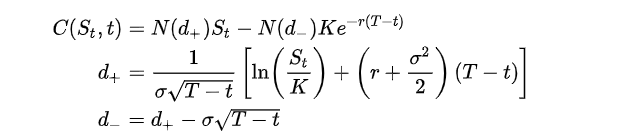

In [ ]:
from scipy.stats import norm

# Parámetros del activo y la opción
S = 100        # Precio actual del activo
K = 100        # Precio de ejercicio
T = 1          # Tiempo hasta vencimiento (en años)
r = 0.05       # Tasa libre de riesgo
sigma = 0.2    # Volatilidad del activo

# Cálculo de d1 y d2
d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# CDF de la normal estándar
N_d1 = norm.cdf(d1)
N_d2 = norm.cdf(d2)

# Precio del call europeo
call = S * N_d1 - K * np.exp(-r * T) * N_d2

print(f"Precio del call europeo (Black-Scholes): {call}")


Precio del call europeo (Black-Scholes): 10.450583572185565


Creemos una función para calcular el precio de Black-Scholes, recibiendo los 5 parámetros:

In [ ]:
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

In [ ]:
primera_opcion = black_scholes_call(S, K, T, r, sigma)
primera_opcion

np.float64(10.450583572185565)

Si quiero calcula el precio cambiando solamente el precio firmado en el contrato (Strike), puedo hacer otra variable y guardar el valor ahí.

In [ ]:
otro_k = 110

In [ ]:
segunda_opcion = black_scholes_call(S, otro_k, T, r, sigma)
segunda_opcion

np.float64(6.040088129724239)

## Paréntesis cultural:

El valor del Put es muy parecido

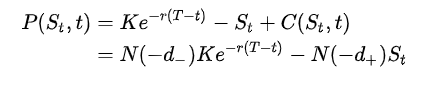

# Valores reales

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

data = yf.download(
        # Lista de tickers o puede ser un string
        tickers = "GOOGL ^IRX",

        # Parámetro "period", tambien se puede utilizar start/end
        # periodos válidos: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (opcional, default es '1mo')
        period = "1y",

        # Peidr datos por intervalo (incluye intradía si es menor a 60 days)
        # intervalos válidos: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (opcional, default es '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (opcional, default es 'column')
        # group_by = 'ticker',
    ).loc[:,'Close']
data

[*********************100%***********************]  2 of 2 completed


Ticker,GOOGL,^IRX
Date,,
2024-04-30,NaN,5.245
2024-05-01,163.080307,5.250
2024-05-02,165.827179,5.238
2024-05-03,166.444229,5.235
2024-05-06,167.300171,5.240
...,...,...
2025-04-24,159.279999,4.197
2025-04-25,161.960007,4.193
2025-04-28,160.610001,4.193


In [ ]:
data.dropna(inplace=True)

In [ ]:
data

Ticker,GOOGL,^IRX
Date,,
2024-05-01,163.080307,5.250
2024-05-02,165.827179,5.238
2024-05-03,166.444229,5.235
2024-05-06,167.300171,5.240
2024-05-07,170.435150,5.243
...,...,...
2025-04-24,159.279999,4.197
2025-04-25,161.960007,4.193
2025-04-28,160.610001,4.193


In [ ]:
# Renombrando columna
data.rename(columns={'^IRX':'IRX'}, inplace=True)

In [ ]:
# Tasa de interes vista como porcentaje
data['IRX'] = data['IRX']/100

In [ ]:
data['ret'] = (data['GOOGL'] / data['GOOGL'].shift(1)) - 1

In [ ]:
# Retornos logaritmicos
data['Vol. GOOGL'] = np.nan
data['log_ret'] = np.log(data['GOOGL']) - np.log(data['GOOGL'].shift(1))

In [ ]:
data

Ticker,GOOGL,IRX,ret,Vol. GOOGL,log_ret
Date,,,,,
2024-05-01,163.080307,0.05250,NaN,NaN,NaN
2024-05-02,165.827179,0.05238,0.016844,NaN,0.016703
2024-05-03,166.444229,0.05235,0.003721,NaN,0.003714
2024-05-06,167.300171,0.05240,0.005143,NaN,0.005129
2024-05-07,170.435150,0.05243,0.018739,NaN,0.018565
...,...,...,...,...,...
2025-04-24,159.279999,0.04197,0.025298,NaN,0.024983
2025-04-25,161.960007,0.04193,0.016826,NaN,0.016686
2025-04-28,160.610001,0.04193,-0.008335,NaN,-0.008370


# Histograma de los Retornos vs Histograma de los Retornos Logarítmicos

<Axes: >

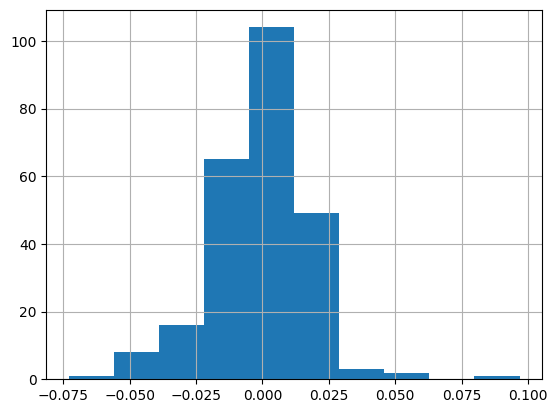

In [ ]:
data.ret.hist()

<Axes: >

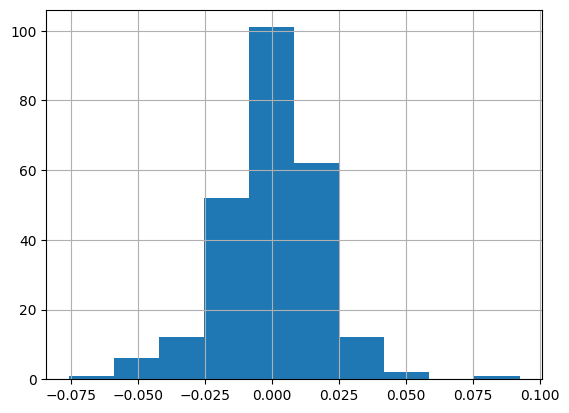

In [ ]:
data.log_ret.hist()

In [ ]:
# Calculando volatilidad y anualizarla
fechas_vol = data.index
for cada_fecha in fechas_vol[125:]:
    data_for_vol = fechas_vol[(cada_fecha - fechas_vol < pd.Timedelta(days=180)) & (cada_fecha - fechas_vol >= pd.Timedelta(days=0))] # 120 dias para 6 meses
    data.loc[cada_fecha, 'Vol. GOOGL'] = np.std(data['log_ret'][data_for_vol].values, ddof=1)*np.sqrt(252)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['calls_Black_Scholes'] = data.apply(lambda x: black_scholes_call(x['GOOGL'], x['GOOGL'] + 0, 360/360, x['IRX'], x['Vol. GOOGL']), axis=1)

In [ ]:
data

Ticker,GOOGL,IRX,ret,Vol. GOOGL,log_ret,calls_Black_Scholes
Date,,,,,,
2024-10-29,169.290771,0.04480,0.017754,0.224241,0.017598,18.783044
2024-10-30,174.059814,0.04463,0.028171,0.227620,0.027781,19.520657
2024-10-31,170.717514,0.04432,-0.019202,0.228428,-0.019389,19.171342
2024-11-01,170.897079,0.04400,0.001052,0.227516,0.001051,19.104354
2024-11-04,168.851791,0.04418,-0.011968,0.227830,-0.012040,18.911349
...,...,...,...,...,...,...
2025-04-24,159.279999,0.04197,0.025298,0.364105,0.024983,25.957689
2025-04-25,161.960007,0.04193,0.016826,0.363422,0.016686,26.349301
2025-04-28,160.610001,0.04193,-0.008335,0.363161,-0.008370,26.113657


<Axes: xlabel='Date'>

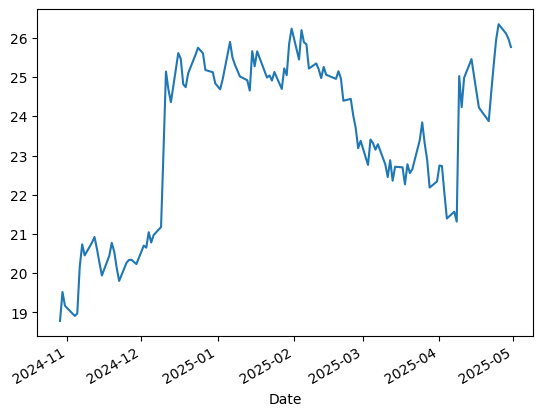

In [ ]:
data.calls_Black_Scholes.plot()

# Ejemplo de comparación de valuaciones:

Este código no se incluye en la clase, pues Monte Carlo requiere si propia clase, pero veamos que diferencia da valuar con distintas técnicas.

La columna que se llama "precio_call" está valuada con MonteCarlo mientras que la llamada "calls_Black_Scholes" se valúa con dicha técnica.

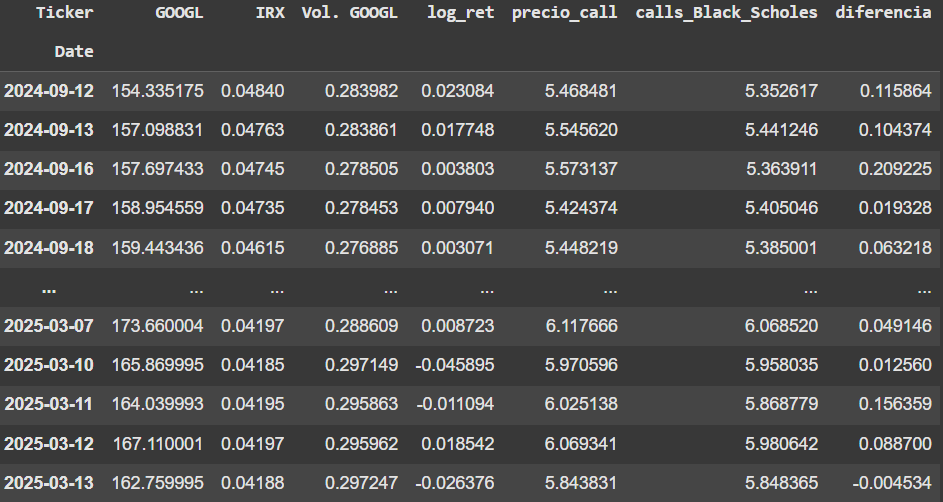

Para mas detalles, se puede revisar el siguiente repositorio:

https://github.com/MaxMitre/Aplicaciones-Financieras/tree/main/Semana6